Training Accuracy: 43.57%
Testing Accuracy: 34.20%


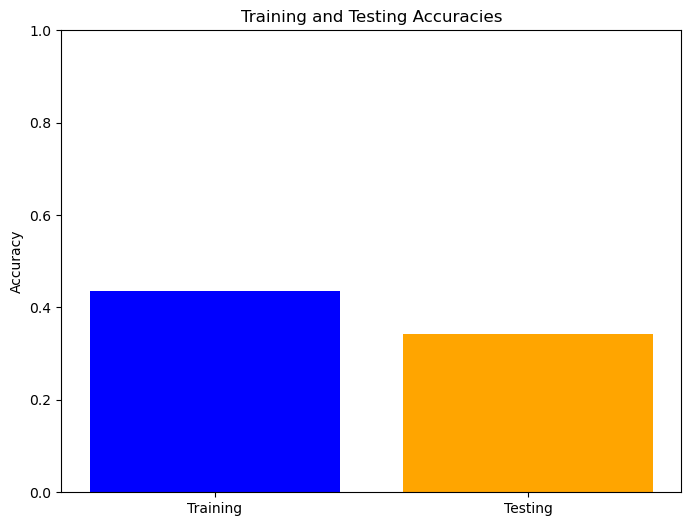

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the cleaned dataset
df = pd.read_csv("cleaned_dataset.csv")

# Drop rows with missing values in the 'Plot' column
df = df.dropna(subset=['Plot'])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Plot'], df['Genre'], test_size=0.2, random_state=42)

# Vectorize the plot text using HashingVectorizer
vectorizer = HashingVectorizer(stop_words='english', n_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train logistic regression model
model = LogisticRegression(max_iter=1000, solver='saga')
model.fit(X_train_vec, y_train)

# Evaluate the model
train_accuracy = accuracy_score(y_train, model.predict(X_train_vec))
test_accuracy = accuracy_score(y_test, model.predict(X_test_vec))

print("Training Accuracy: {:.2f}%".format(train_accuracy * 100))
print("Testing Accuracy: {:.2f}%".format(test_accuracy * 100))

# Plotting the accuracies
plt.figure(figsize=(8, 6))
plt.bar(['Training', 'Testing'], [train_accuracy, test_accuracy], color=['blue', 'orange'])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracies')
plt.show()
